# WeatherPy

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from config import owm_api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []




owm_api_key = "931e76e2657e7d5df1fa1d29da3108da"

#URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + owm_api_key

# Start counter 
record = 1

#start print
print(f"Beginning Data Retrieval")
print(f"--------------------------------------")

#loop through city list
#Perform a weather check on each of the cities using a series of successive API calls.
for city in cities:   
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one to add to the list
        record = record + 1
        
    # except for when the weather data is not found for the city
    except:
        print("City not found. Skipping...")
    continue

print(f"--------------------------------------")
print(f"Data Retrieval Complete")
print(f"--------------------------------------")

Beginning Data Retrieval
--------------------------------------
Processing Record 1 | North Bend
Processing Record 2 | Hermanus
Processing Record 3 | Hobart
Processing Record 4 | Sao Filipe
Processing Record 5 | Tautira
Processing Record 6 | Atuona
Processing Record 7 | Yellowknife
Processing Record 8 | Cape Town
Processing Record 9 | Narsaq
Processing Record 10 | Ozinki
Processing Record 11 | Ushuaia
City not found. Skipping...
Processing Record 12 | Sinnamary
Processing Record 13 | Mocuba
Processing Record 14 | Toro
Processing Record 15 | Kapaa
Processing Record 16 | Avarua
Processing Record 17 | Bundaberg
Processing Record 18 | Koumac
Processing Record 19 | Jumla
Processing Record 20 | Naze
Processing Record 21 | Pacific Grove
Processing Record 22 | Butaritari
Processing Record 23 | Redmond
Processing Record 24 | Saint Anthony
Processing Record 25 | Busselton
Processing Record 26 | Maragogi
Processing Record 27 | Fortuna
Processing Record 28 | Sisimiut
Processing Record 29 | Arman
P

Processing Record 229 | Codrington
Processing Record 230 | Cabatuan
Processing Record 231 | Dingle
Processing Record 232 | Luderitz
Processing Record 233 | Valkla
Processing Record 234 | Auki
Processing Record 235 | Qingdao
Processing Record 236 | Kyabe
City not found. Skipping...
Processing Record 237 | Malvern
City not found. Skipping...
Processing Record 238 | San Cristobal
Processing Record 239 | Weiser
Processing Record 240 | Ulverstone
City not found. Skipping...
Processing Record 241 | Vao
Processing Record 242 | Fomboni
Processing Record 243 | Bumbuna
Processing Record 244 | Port Lincoln
Processing Record 245 | Mount Gambier
Processing Record 246 | Namtsy
Processing Record 247 | Nemuro
Processing Record 248 | Macusani
Processing Record 249 | Siva
Processing Record 250 | Gurupi
Processing Record 251 | Saint George
Processing Record 252 | Piura
Processing Record 253 | Bom Jesus
Processing Record 254 | Yataity del Norte
Processing Record 255 | Pincher Creek
City not found. Skippin

Processing Record 456 | Diapaga
Processing Record 457 | Teya
Processing Record 458 | Abha
Processing Record 459 | Mayo
Processing Record 460 | Parana
Processing Record 461 | Nome
Processing Record 462 | Linxia
Processing Record 463 | Aksu
Processing Record 464 | North Platte
Processing Record 465 | Vardo
Processing Record 466 | Sitka
City not found. Skipping...
Processing Record 467 | Kuching
Processing Record 468 | Chiang Klang
Processing Record 469 | Salinopolis
Processing Record 470 | Susaki
Processing Record 471 | Crib Point
Processing Record 472 | Chulucanas
Processing Record 473 | Palencia
Processing Record 474 | Barahona
Processing Record 475 | Tigre
Processing Record 476 | Praya
Processing Record 477 | Port Keats
Processing Record 478 | Lavrentiya
Processing Record 479 | Eyl
Processing Record 480 | Haverfordwest
Processing Record 481 | Shentala
Processing Record 482 | Port Hawkesbury
Processing Record 483 | Lithgow
Processing Record 484 | Seguela
Processing Record 485 | Chepare

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary
dict = {"City": city_name,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity": humidity,
        "Lat":lat,"Lng":lng,"Max Temp": max_temp,"Wind Speed":wind_speed}

# insert date frame
df = pd.DataFrame(dict)

# count of the df
df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [5]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,North Bend,90,US,1538279760,80,43.41,-124.22,60.98,5.82
1,Hermanus,0,ZA,1538280476,77,-34.42,19.24,42.45,2.39
2,Hobart,40,AU,1538278200,34,-42.88,147.33,66.20,16.11
3,Sao Filipe,88,CV,1538280477,100,14.90,-24.50,76.74,8.66
4,Tautira,75,PF,1538278200,69,-17.73,-149.15,78.80,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

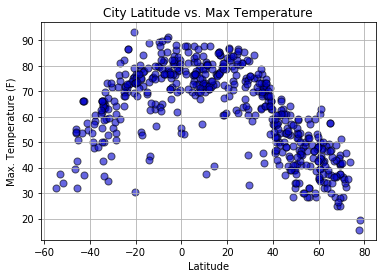

In [6]:
# plot
plt.scatter(df["Lat"], df["Max Temp"], marker="o", s=50, color="mediumblue", edgecolors="black",alpha = 0.6)

#labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

#save the figure
plt.savefig("lat_temp.png")

#show plot
plt.show()

#### Latitude vs. Humidity Plot

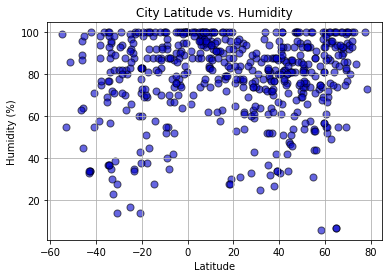

In [7]:
# plot
plt.scatter(df["Lat"], df["Humidity"], marker="o", s=50, color="mediumblue", edgecolors="black",alpha = 0.6)

#labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#save the figure
plt.savefig("lat_humidity.png")

#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

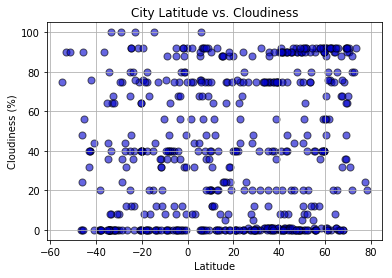

In [8]:
# plot
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", s=50, color="mediumblue", edgecolors="black", alpha = 0.6)

#labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#save the figure
plt.savefig("lat_cloudiness.png")

#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

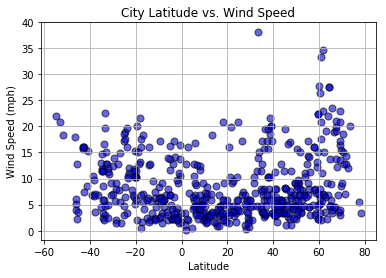

In [9]:
# plot
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", s=50, color="mediumblue", edgecolors="black",alpha = 0.6)

#labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

#save the figure
plt.savefig("lat_wind.png")

#show plot
plt.show()